Team DF shape: (8, 10)
Player DF shape: (17, 9)


,Match,Team,Opponent,Result,Attack,Block,Serve,Opponent Error,Total,Best Scorers
0,Italy vs Poland (Semi),Italy,Poland,W,51,11,3,10,75,"Egonu (17), Degradi (13)"
1,Italy vs Poland (Semi),Poland,Italy,L,30,6,1,11,48,"Korneluk (11), Smarzek (9)"
2,Brazil vs Japan (Semi),Brazil,Japan,W,69,14,2,22,107,"Gabi (25), Bergmann (24)"
3,Brazil vs Japan (Semi),Japan,Brazil,L,62,9,3,23,97,"Wada (20), Ishikawa (19)"
4,Italy vs Brazil (Final),Italy,Brazil,W,58,14,3,22,97,"Antropova (18), Sylla (16)"


,Match,Team,Player,Position,Attack Points,Block Points,Serve Points,Efficiency %,Total Points
0,Italy vs Poland (Semi),Italy,Egonu,O,15,1,1,21.57,17
1,Italy vs Poland (Semi),Italy,Degradi,OH,13,0,0,27.78,13
2,Italy vs Poland (Semi),Italy,Fahr,MB,6,3,0,5.00,9
3,Italy vs Poland (Semi),Poland,Korneluk,MB,6,5,0,12.90,11
4,Italy vs Poland (Semi),Poland,Smarzek,O,7,1,1,20.00,9


/tmp/ipython-input-1380693381.py:88: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=melted, x="Team", y="Points", hue="Skill", estimator=sum, ci=None)


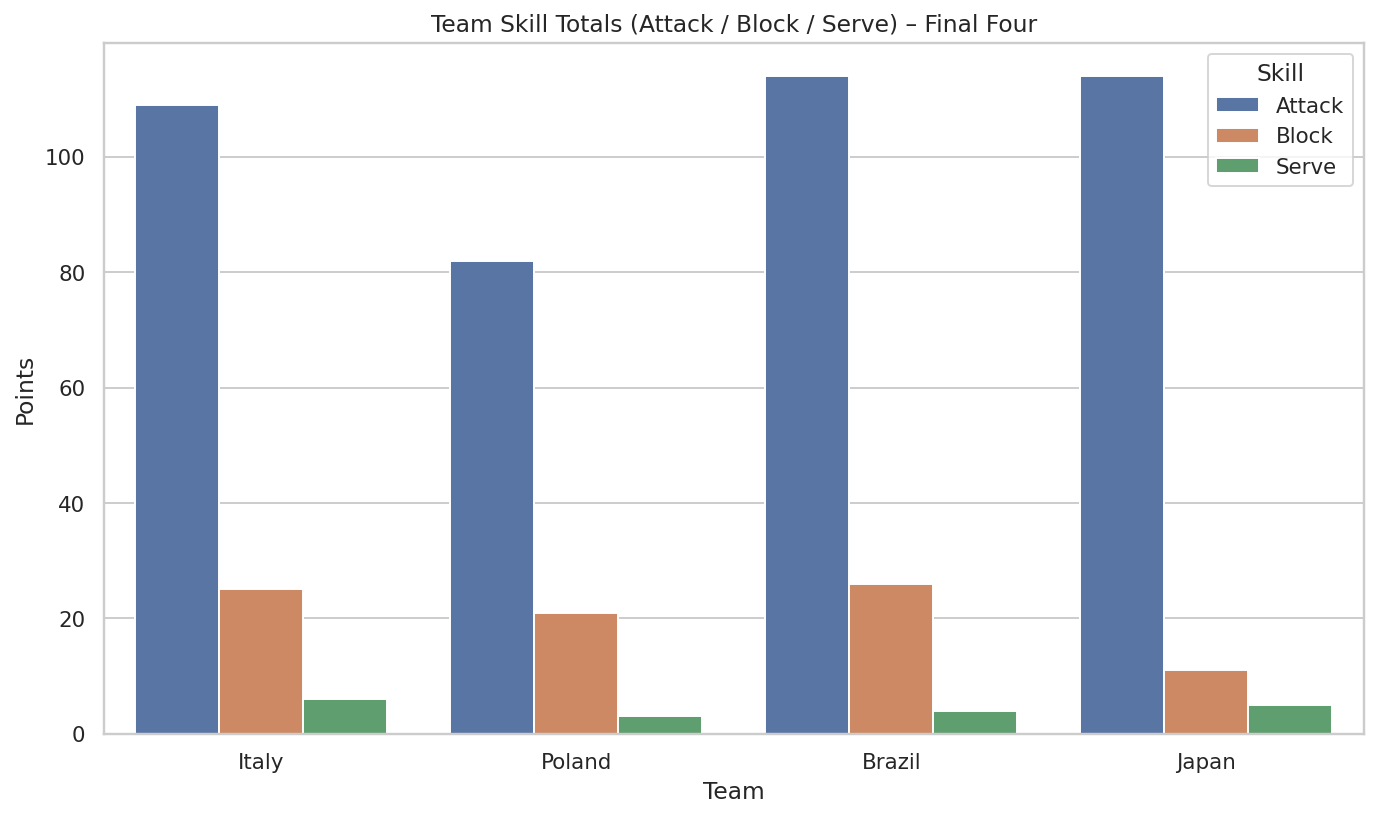

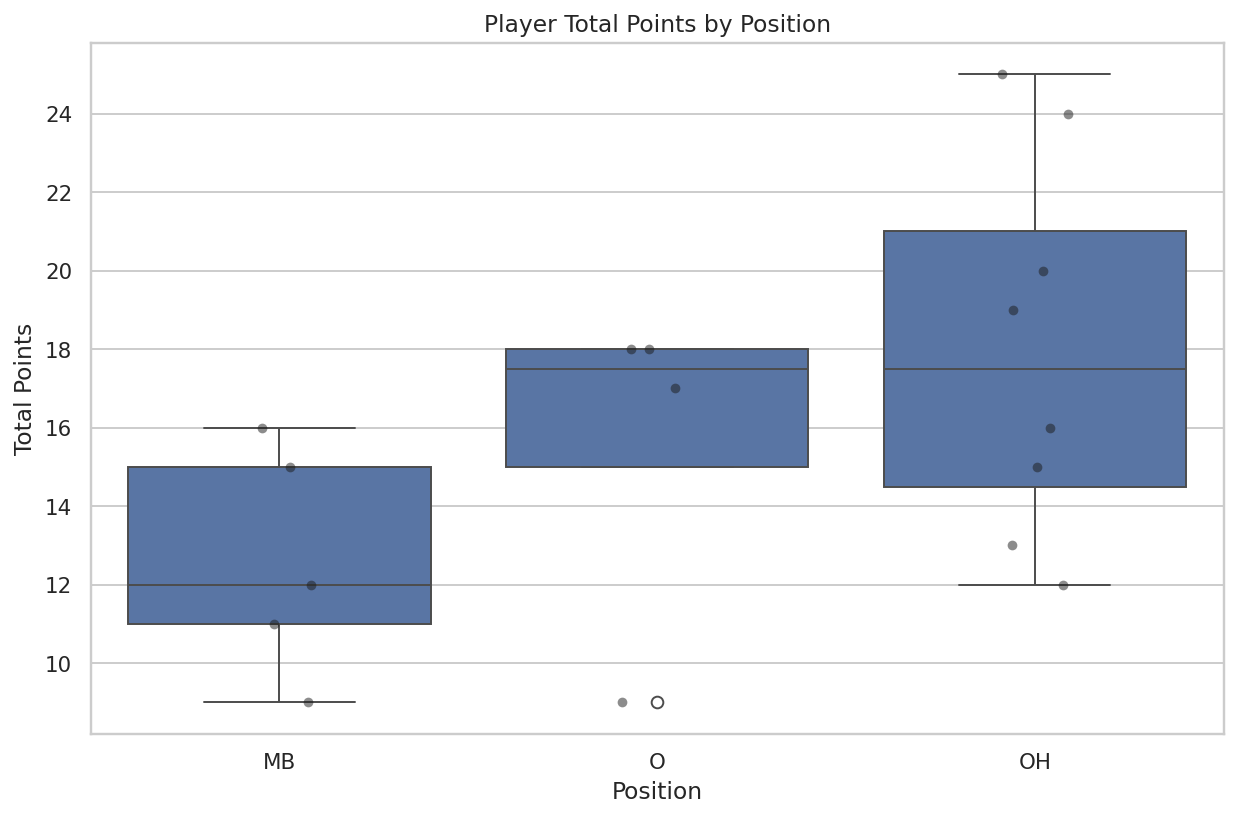

/tmp/ipython-input-1380693381.py:101: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_eff = player_df.groupby("Position")["Efficiency %"].mean().sort_values(ascending=False)


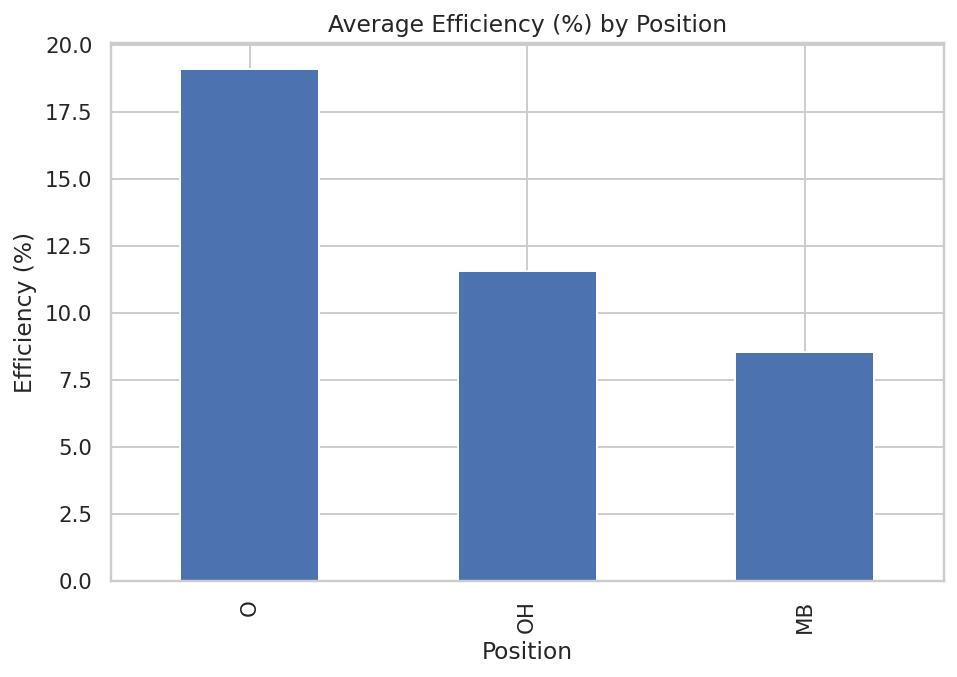

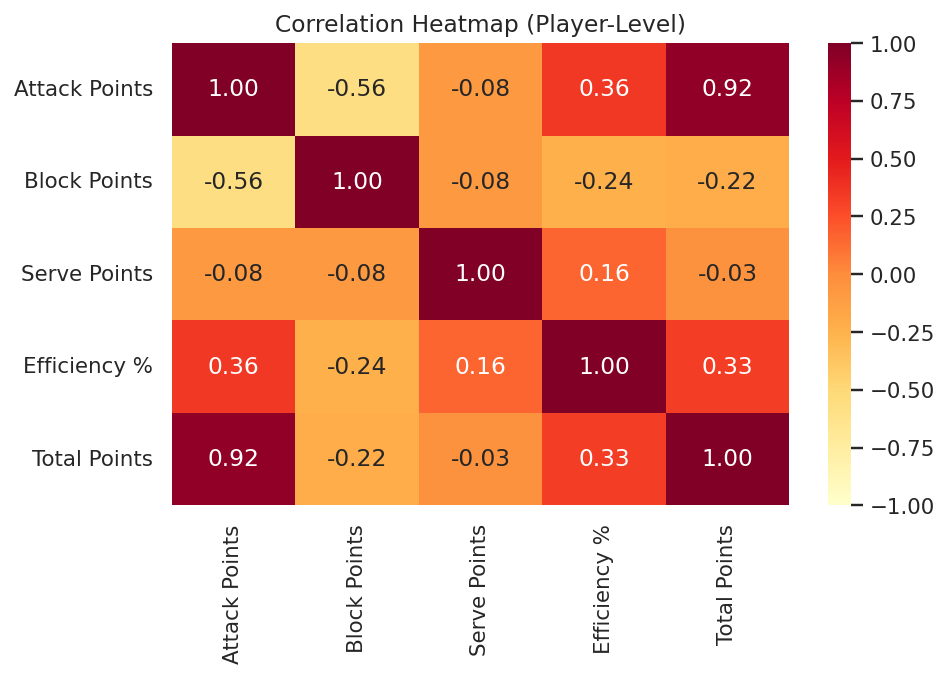


[ANOVA] Total Points ~ Position
F = 2.486, p = 0.1192
=> Not significant (fail to reject H0)

[Paired t-test] Attack Points vs Block Points
t = 6.252, p = 0.0000
=> SIGNIFICANT difference

Top Scorers per Match (from Player Stats):


/tmp/ipython-input-1380693381.py:119: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [g["Total Points"].dropna() for _, g in player_df.groupby("Position")]


,Match,Team,Player,Position,Total Points
5,Brazil vs Japan (Semi),Brazil,Gabi,OH,25
7,Brazil vs Japan (Semi),Japan,Wada,OH,20
9,Italy vs Brazil (Final),Italy,Antropova,O,18
11,Italy vs Brazil (Final),Brazil,Gabi,OH,15
0,Italy vs Poland (Semi),Italy,Egonu,O,17
3,Italy vs Poland (Semi),Poland,Korneluk,MB,11
13,Poland vs Japan (3rd),Poland,Stysiak,O,18
15,Poland vs Japan (3rd),Japan,Shimamura,MB,15



Team Summary (Attack, Block, Serve, Opp Error, Total):


,Match,Team,Result,Attack,Block,Serve,Opponent Error,Total
0,Italy vs Poland (Semi),Italy,W,51,11,3,10,75
1,Italy vs Poland (Semi),Poland,L,30,6,1,11,48
2,Brazil vs Japan (Semi),Brazil,W,69,14,2,22,107
3,Brazil vs Japan (Semi),Japan,L,62,9,3,23,97
4,Italy vs Brazil (Final),Italy,W,58,14,3,22,97
5,Italy vs Brazil (Final),Brazil,L,45,12,2,28,87
6,Poland vs Japan (3rd),Poland,W,52,15,2,30,99
7,Poland vs Japan (3rd),Japan,L,52,2,2,24,80



All done ✅


In [5]:
# =========================================
# DSA210 Term Project – VNL 2025 Positional Impact Analysis
# Author: Tuana İnci
# =========================================

import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set(style="whitegrid")
plt.rcParams["figure.dpi"] = 140

# ---------------------------
# 0) EMBEDDED CSV DATA
# ---------------------------
TEAM_CSV = """Match,Team,Opponent,Result,Attack,Block,Serve,Opponent Error,Total,Best Scorers
Italy vs Poland (Semi),Italy,Poland,W,51,11,3,10,75,"Egonu (17), Degradi (13)"
Italy vs Poland (Semi),Poland,Italy,L,30,6,1,11,48,"Korneluk (11), Smarzek (9)"
Brazil vs Japan (Semi),Brazil,Japan,W,69,14,2,22,107,"Gabi (25), Bergmann (24)"
Brazil vs Japan (Semi),Japan,Brazil,L,62,9,3,23,97,"Wada (20), Ishikawa (19)"
Italy vs Brazil (Final),Italy,Brazil,W,58,14,3,22,97,"Antropova (18), Sylla (16)"
Italy vs Brazil (Final),Brazil,Italy,L,45,12,2,28,87,"Gabi (15), Julia (12)"
Poland vs Japan (3rd),Poland,Japan,W,52,15,2,30,99,"Stysiak (18), Korneluk (16)"
Poland vs Japan (3rd),Japan,Poland,L,52,2,2,24,80,"Shimamura (15), Ishikawa (12)"
"""

PLAYER_CSV = """Match,Team,Player,Position,Attack Points,Block Points,Serve Points,Efficiency %
Italy vs Poland (Semi),Italy,Egonu,O,15,1,1,21.57
Italy vs Poland (Semi),Italy,Degradi,OH,13,0,0,27.78
Italy vs Poland (Semi),Italy,Fahr,MB,6,3,0,5.00
Italy vs Poland (Semi),Poland,Korneluk,MB,6,5,0,12.90
Italy vs Poland (Semi),Poland,Smarzek,O,7,1,1,20.00
Brazil vs Japan (Semi),Brazil,Gabi,OH,24,1,0,18.67
Brazil vs Japan (Semi),Brazil,Bergmann,OH,23,1,0,17.11
Brazil vs Japan (Semi),Japan,Wada,OH,19,1,0,12.70
Brazil vs Japan (Semi),Japan,Ishikawa,OH,17,1,1,13.70
Italy vs Brazil (Final),Italy,Antropova,O,13,4,1,15.91
Italy vs Brazil (Final),Italy,Sylla,OH,13,3,0,9.43
Italy vs Brazil (Final),Brazil,Gabi,OH,10,4,1,1.56
Italy vs Brazil (Final),Brazil,Julia,MB,7,5,0,2.17
Poland vs Japan (3rd),Poland,Stysiak,O,16,2,0,18.97
Poland vs Japan (3rd),Poland,Korneluk,MB,8,8,0,12.50
Poland vs Japan (3rd),Japan,Shimamura,MB,13,2,0,10.00
Poland vs Japan (3rd),Japan,Ishikawa,OH,12,0,0,-8.62
"""

# ---------------------------
# 1) LOAD DATA FROM STRINGS
# ---------------------------
team_df = pd.read_csv(io.StringIO(TEAM_CSV))
player_df = pd.read_csv(io.StringIO(PLAYER_CSV))

# ensure proper dtypes
num_cols_team = ["Attack","Block","Serve","Opponent Error","Total"]
for c in num_cols_team:
    team_df[c] = pd.to_numeric(team_df[c], errors="coerce")

num_cols_player = ["Attack Points","Block Points","Serve Points","Efficiency %"]
for c in num_cols_player:
    player_df[c] = pd.to_numeric(player_df[c], errors="coerce")

# computed column
player_df["Total Points"] = (
    player_df["Attack Points"].fillna(0)
  + player_df["Block Points"].fillna(0)
  + player_df["Serve Points"].fillna(0)
)
player_df["Position"] = player_df["Position"].astype("category")

print("Team DF shape:", team_df.shape)
print("Player DF shape:", player_df.shape)
display(team_df.head())
display(player_df.head())

# ---------------------------
# 2) EDA – PLOTS
# ---------------------------
# 2.1 Team skill distribution per team (Attack/Block/Serve)
melted = team_df.melt(
    id_vars=["Match","Team","Result"],
    value_vars=["Attack","Block","Serve"],
    var_name="Skill", value_name="Points"
)
plt.figure(figsize=(10,6))
sns.barplot(data=melted, x="Team", y="Points", hue="Skill", estimator=sum, ci=None)
plt.title("Team Skill Totals (Attack / Block / Serve) – Final Four")
plt.ylabel("Points")
plt.tight_layout(); plt.show()

# 2.2 Player total points by position (box + strip)
plt.figure(figsize=(9,6))
sns.boxplot(data=player_df, x="Position", y="Total Points")
sns.stripplot(data=player_df, x="Position", y="Total Points", color="k", alpha=0.5)
plt.title("Player Total Points by Position")
plt.tight_layout(); plt.show()

# 2.3 Average efficiency by position
avg_eff = player_df.groupby("Position")["Efficiency %"].mean().sort_values(ascending=False)
plt.figure(figsize=(7,5))
avg_eff.plot(kind="bar")
plt.title("Average Efficiency (%) by Position")
plt.ylabel("Efficiency (%)")
plt.tight_layout(); plt.show()

# 2.4 Player-level correlation heatmap
corr = player_df[["Attack Points","Block Points","Serve Points","Efficiency %","Total Points"]].corr()
plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, cmap="YlOrRd", fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Heatmap (Player-Level)")
plt.tight_layout(); plt.show()

# ---------------------------
# 3) HYPOTHESIS TESTS
# ---------------------------
# H1: Different positions have different mean total points (One-way ANOVA)
groups = [g["Total Points"].dropna() for _, g in player_df.groupby("Position")]
if len(groups) >= 2 and all(len(x) > 1 for x in groups):
    anova = stats.f_oneway(*groups)
    print("\n[ANOVA] Total Points ~ Position")
    print("F = {:.3f}, p = {:.4f}".format(anova.statistic, anova.pvalue))
    print("=>", "SIGNIFICANT (reject H0)" if anova.pvalue < 0.05 else "Not significant (fail to reject H0)")
else:
    print("\n[ANOVA] Not enough groups/samples to run robustly with this subset.")

# H2: Attack vs Block (paired t-test over players)
if player_df["Attack Points"].notna().sum() > 1 and player_df["Block Points"].notna().sum() > 1:
    t_stat, p_val = stats.ttest_rel(player_df["Attack Points"], player_df["Block Points"])
    print("\n[Paired t-test] Attack Points vs Block Points")
    print("t = {:.3f}, p = {:.4f}".format(t_stat, p_val))
    print("=>", "SIGNIFICANT difference" if p_val < 0.05 else "No significant difference")
else:
    print("\n[Paired t-test] Not enough paired samples.")

# ---------------------------
# 4) QUICK SUMMARIES
# ---------------------------
print("\nTop Scorers per Match (from Player Stats):")
top_each_match = (
    player_df.sort_values(["Match","Total Points"], ascending=[True, False])
             .groupby(["Match","Team"], as_index=False).head(1)
             [["Match","Team","Player","Position","Total Points"]]
)
display(top_each_match)

print("\nTeam Summary (Attack, Block, Serve, Opp Error, Total):")
display(team_df[["Match","Team","Result","Attack","Block","Serve","Opponent Error","Total"]])

print("\nAll done ✅")


# Yeni Bölüm